Exercise 1

Using tensorflow, construct and train a network consisting of fully connected layers for classification of MNIST dataset.
 Construct and train a fully connected autoencoder. Be able to explain details of your implementation and justify the decisions made.

Fully connected Mnist classifier

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Flatten , Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy , MeanSquaredError
from keras.utils import to_categorical


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


According to doc we should have 60000 examples in training and 10000 examples in testing dataset

In [3]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
# fully connected neural network model 

model = Sequential([
    Flatten(),  # shoud be 28*28 , vector of length 784,
    Dense(units = 128 , use_bias = True, activation = 'relu'),
    Dense(units = 64 , use_bias = True, activation = 'relu'),
    Dense(units = 10 , activation = 'softmax')   # as we have 10 numbers to classify so we want to get same number of classes in the end 
     
])


In [5]:
# prepare optimizer as proposed using Adam 
model.compile(optimizer= Adam(learning_rate=0.001), # defalt lr 
              loss = CategoricalCrossentropy(from_logits= False), # as we have output from final layer in probabability like values 
              metrics = ['accuracy'] 
              )

In [6]:
# 1-hot encoding for target 
train_labels = to_categorical(Y_train,num_classes=10) # one hot encoding 3 type of flowers  # full set 
test_labels = to_categorical(Y_test,num_classes=10)


In [7]:
model.fit(X_train,train_labels, epochs=10 , batch_size= None)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7803 - loss: 4.2862
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9170 - loss: 0.3087
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9429 - loss: 0.2063
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9542 - loss: 0.1595
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9594 - loss: 0.1433
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.9670 - loss: 0.1195
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9702 - loss: 0.1076
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9723 - loss: 0.1027
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.9746 - loss: 0.0884
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9779 - loss: 0.0818


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, test_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9636 - loss: 0.1566
Test Loss: 0.1325
Test Accuracy: 0.9698


Fully connected encoder 

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
# we only need independent variable so X_test and X_train for tests

# normalize 
X_train = X_train / 255.0 # transafer 0-255 rgb scale to 0-1 scale
X_test = X_test / 255.0

# flatten data 
X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))



In [12]:
# to make proper use of encoder we should reduce dimensionality otherwise we will just train encoder to copy original data, that's not very useful
encoder_dim = 256

# encoder 
encoder = Sequential([
    Dense(units = 128 , use_bias = True, activation = 'relu'),
    Dense(encoder_dim, activation='relu')
])

decoder = Sequential([
    Dense(128,activation='relu'), # output from encode
    Dense(28*28, activation='sigmoid') # same as original
])
# composing autoencoder 
autoencoder = Sequential([encoder,decoder])




In [13]:
autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=MeanSquaredError()
)

In [14]:
learned_values = autoencoder.fit(
    X_train, X_train,  # Input and target are the same
    epochs=20,
    batch_size=None
    )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0373
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0082
Epoch 3/20
 633/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063

KeyboardInterrupt: 

In [ ]:
# Evaluate the autoencoder on the test set
test_loss = autoencoder.evaluate(X_test, X_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")


313/313 - 0s - 531us/step - loss: 0.0023
Test Loss: 0.0023


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


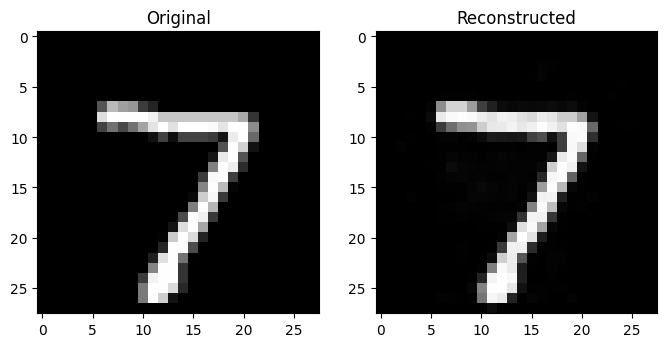

In [ ]:
# Pick a random test sample
import matplotlib.pyplot as plt 
sample_index = 0
original = X_test[sample_index]
encoded = encoder.predict(original.reshape(1, -1))
decoded = decoder.predict(encoded)

# Reshape for visualization
original_image = original.reshape(28, 28)
decoded_image = decoded.reshape(28, 28)

# Plot the original and reconstructed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original_image, cmap='gray')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.title("Reconstructed")
plt.imshow(decoded_image, cmap='gray')

plt.show()
